# Análise dos Dados de Diagnóstico de Câncer
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">

# Índice <a name="Contents"></a>

- [Entendimento do negócio](#1)
- [Entendimento e preparação dos dados](#2e3)
  > - [Import das bibliotecas/pacotes](#import)
  > - [Importação dos Dados](#leitura)
  > - [Infosvmações e visualização dos dados importados](#info)
  > - [Dicionário das variáveis](#dicionario)
  > - [Analisando a estrutura do Dataset](#estrutura)
- [Limpeza e Tratamento de Dados](#limpeza)
   > - [Identificando e Tratando Valores Ausentes (Nan)](#nan)
   > - [Identificando e Tratando Valores Duplicados](#duplicados)
   > - [Identificando e Tratando Valores Outiliers](#outilier)
-[Análise Exploratória de Dados](#EDA)
  > - [Análise univariada](#univariada)
  > - [Análises Estatísticas Descritivas](#descritiva)
  > - [Transformação da Variável diagnosis](#transformacao)
  > - [Correlação Linear](#correlacao)
- [Pré-Processamento](#pre_processamento)
  > - [Separação das Variáveis Alvo (y) e das Variáveis Preditoras (X)](#separacao)
  > - [Separação dos Dados Em teino e teste](#treinoeteste)
- [Modelagem](#modelagem)
- [Avaliação do Modelo](#avaliacao_modelo)
- [Otimização do Modelo](#otimizacao)
- [Implementação](#implementacao)
- [Conclusão](#conclusao)



# Entendimento do negócio <a name="1"></a>

- Aquisição dos dados

Para esta análise, utilizaremos o conjunto de dados de diagnóstico de câncer de mama em Wisconsin, disponibilizado pelo [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). A biblioteca Pandas será nossa principal ferramenta para a manipulação e análise desses dados. </p>
  
- Objetivos do projeto
> <p align="justify">

> Nosso objetivo é criar uma ferramenta que ajude a identificar se um tumor é inofensivo (benigno) ou se pode se espalhar (maligno), permitindo um tratamento mais adequado. </p>


- Métricas de avaliação
> Quais métricas serão utilizadas para avaliar o desempenho do modelo (acurácia, precisão, recall, F1-score, etc.)?
     
[Voltar ao índice](#Contents)


# Coleta e Preparação dos Dados <a name="2e3"></a>


### Import das bibliotecas/pacotes <a name="import"></a>

<div style="text-align: right"
  
Aqui concentrarei todas as bibliotecas utilizadas durante o projeto

[Voltar ao índice](#Contents)

In [2]:
!pip install scikit-learn==1.2.2
!pip install xgboost==1.7.5
!pip install catboost

In [3]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Bibliotecas para machine learning
# Pré-processamento
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score,  classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Validação cruzada
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Importação dos Dados <a name="leitura"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UDEMY/Machine Learning/CLASSIFICAÇÃO/data_cancer.csv')

### Informações e visualização dos dados importados <a name="info"></a>

<div style="text-align: right"

Iniciaremos a exploração visualizando as 5 primeiras e 5 últimas entradas do DataFrame, obtendo assim uma visão geral de sua organização.

[Voltar ao índice](#Contents)



In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### Dicionário das variáveis <a name=dicionario></a>


<p align="justify">
Com as 5 primeiras entradas impressas na tela, pode-se ter então uma noção de como os dados estão estruturados, bem como quais são as variáveis mais importantes para o início da investigação. A seguir apresentaremos uma tabela contendo o significado de cada variável do DataFrame:</p>
  
[Voltar ao índice](#Contents)

| Variável | Descrição |
|----------|------------|
| id | Identificador único de cada paciente |
| diagnosis | Diagnóstico: M (maligno) ou B (benigno) |
| radius_mean | Raio médio da célula nuclear |
| texture_mean | Textura média (variação nos níveis de cinza) |
| perimeter_mean | Perímetro médio da célula nuclear |
| area_mean | Área média da célula nuclear |
| smoothness_mean | Suavidade média (variação local no comprimento do raio) |
| compactness_mean | Compacidade média (perímetro^2/área - 1) |
| concavity_mean | Concavidade média (severidade das porções côncavas do contorno) |
| concave points_mean | Número médio de pontos côncavos no contorno |
| symmetry_mean | Simetria média |
| fractal_dimension_mean | Dimensão fractal média (aproximação da linha costeira) |
| radius_se | Erro padrão do raio |
| texture_se | Erro padrão da textura |
| perimeter_se | Erro padrão do perímetro |
| area_se | Erro padrão da área |
| smoothness_se | Erro padrão da suavidade |
| compactness_se | Erro padrão da compacidade |
| concavity_se | Erro padrão da concavidade |
| concave points_se | Erro padrão do número de pontos côncavos |
| symmetry_se | Erro padrão da simetria |
| fractal_dimension_se | Erro padrão da dimensão fractal |
| radius_worst | Pior (maior) valor do raio |
| texture_worst | Pior valor da textura |
| perimeter_worst | Pior valor do perímetro |
| area_worst | Pior valor da área |
| smoothness_worst | Pior valor da suavidade |
| compactness_worst | Pior valor da compacidade |
| concavity_worst | Pior valor da concavidade |
| concave points_worst | Pior valor


### Analisando a estrutura do Dataset <a name=estrutura></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [7]:
df.shape

(569, 33)

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<p align="justify">
Após a análise inicial, constatou-se que o conjunto de dados não apresenta valores ausentes. O dataframe possui 569 observações e 31 variáveis numéricas e 2 variáveis categóricas, as quais serão transformadas posteriormente. </p>


## Limpeza e Tratamento de Dados <a name=limpeza></a>

<p align= "justify">

A preparação dos dados para análise é fundamental para garantir a qualidade e a confiabilidade dos resultados. Nesta etapa, realizaremos as seguintes atividades:</p>

- Verificar e tratar os valores ausentes
- Verificar e tratar os dados duplicados
- Verificar e tratar os Outliers
- Tranformar a variável **diagnosis**
- Excluir a variável **Unnamed: 32**


[Voltar ao índice](#Contents)



### Identificando Valores Ausentes (Nan)<a name=nan></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


In [10]:
# CALCULANDO OS VALORES AUSENTES NO DATAFRAME

df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Identificando Valores Duplicados<a name=duplicados></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


In [11]:
# Identificando linhas duplicadas

duplicados = df.duplicated().sum()
print(f'O dataframe possui {duplicados} linhas duplicadas')

O dataframe possui 0 linhas duplicadas


Após análise da qualidade dos dados, constatamos que apenas a variável Unnamed: 32 possui valores ausentes e será removida posteriormente. Além disto não foram encontrados registros duplicados no conjunto de dados.

### Identificando e Tratando Outiliers<a name=outilier></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


In [12]:
# Criando um Boxplot para cada variável do DataFrame

plt.figure(figsize=(12, 6))
for column in df:
  fig = px.box(df, y=column)
  fig.show()

<Figure size 1200x600 with 0 Axes>

## Transformação da Variável diagnosis <a name="transformacao"></a>


<p align="justify">Conforme analisado previamente, a variável 'diagnosis' é a única variável categórica presente no conjunto de dado, que descreve características por categorias ('B' ou 'M'). Para que possamos aplicá-la em modelos de aprendizado de máquina, que geralmente operam com dados numéricos, é necessário realizar uma transformação de suas categorias para uma representação numérica.</p>

[Voltar ao índice](#Contents)

-  Verificando os valores da variável diagnosis

In [13]:
df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


- Substituindo os valores de **diagnosis** utilizando o método *.map()*

In [14]:
mapping = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapping)

- Atualizando e verificando os valores da variável  **diagnosis**

In [15]:
df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## Exclusão da variável  **Unnamed: 32**


<p align="justify"> Como vimos anteriormente a análise de dados faltantes revelou que apenas a variável Unnamed: 32 apresenta valores ausentes. Considerando que essa variável não influencia significativamente os resultados da nossa análise, optamos por excluí-la do conjunto de dados.</p>

[Voltar ao índice](#Contents)

In [16]:
df = df.drop(columns = 'Unnamed: 32', axis = 1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.shape

(569, 32)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Análise Exploratória de Dados (EDA) <a name=EDA></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


#### Análise univariada <a name="univariada"></a>
<div style="text-align: right"

Com o objetivo de explorar os dados de forma individualizada, realizaremos uma análise de cada variável



In [19]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212



Distribuição percentual da variável resposta (diagnosis):
diagnosis
B (0)    62.74
M (1)    37.26
Name: proportion, dtype: float64


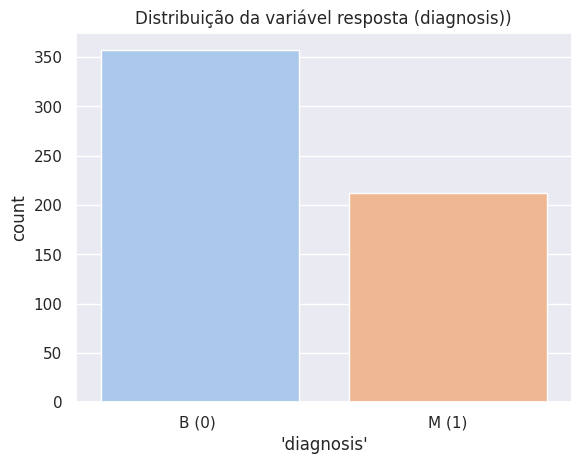

In [20]:
print('\nDistribuição percentual da variável resposta (diagnosis):')
print(round(df.diagnosis.value_counts(normalize=True).rename(
    {False: 'B (0)',
     True: 'M (1)'}) * 100, 2))

sns.set_theme(style='darkgrid')
sns.countplot(x= 'diagnosis', hue='diagnosis', data=df, legend=False, palette= 'pastel');
plt.title(label='Distribuição da variável resposta (diagnosis))')
plt.xlabel(xlabel="'diagnosis'")
plt.xticks(ticks=[0,1],
           labels=['B (0) ', 'M (1)'])
plt.show()


De acordo com os dados da variável **"diagnosis"**, a incidência de tumores benignos supera a de tumores malignos no dataset.

- Criando um gráfico para cada variável

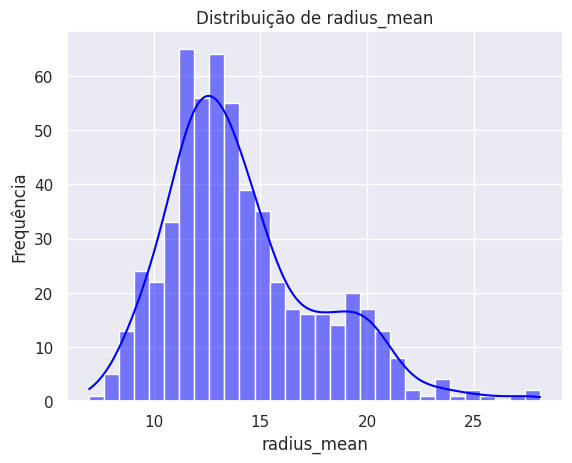

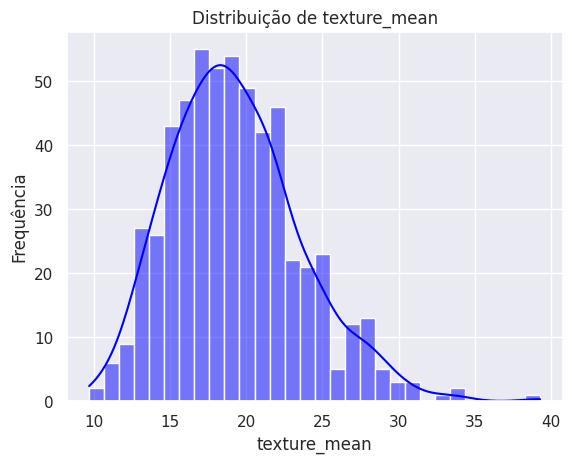

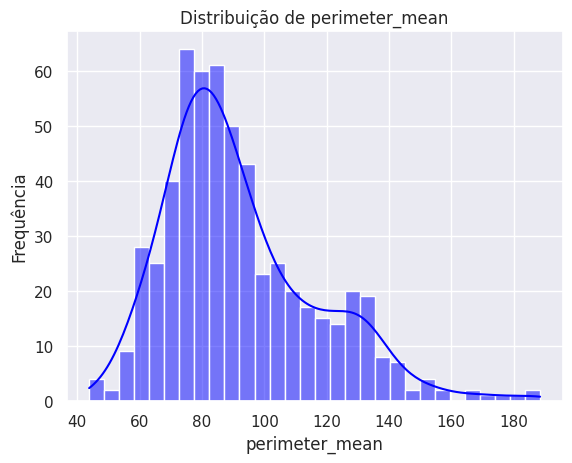

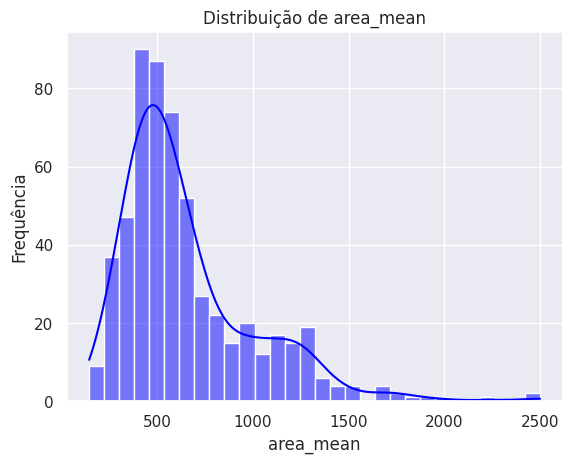

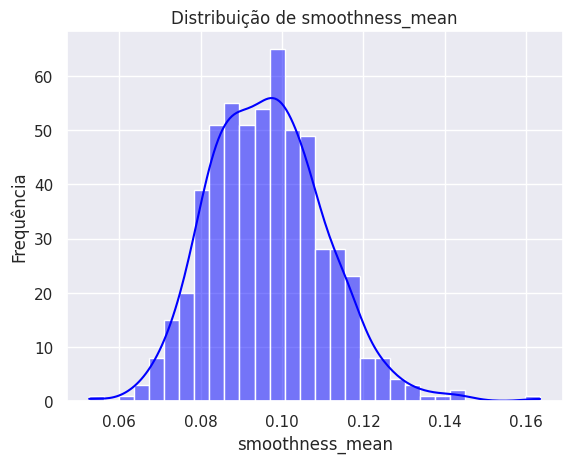

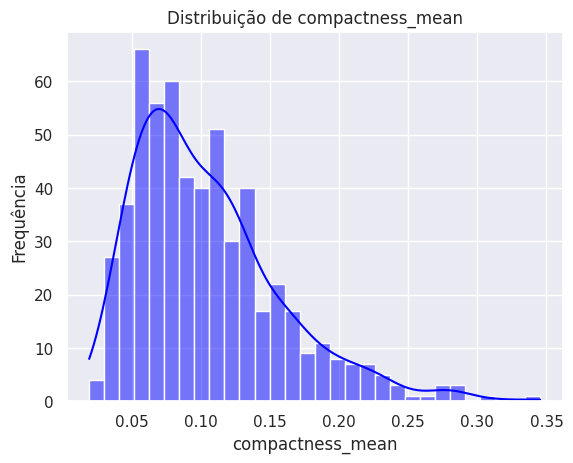

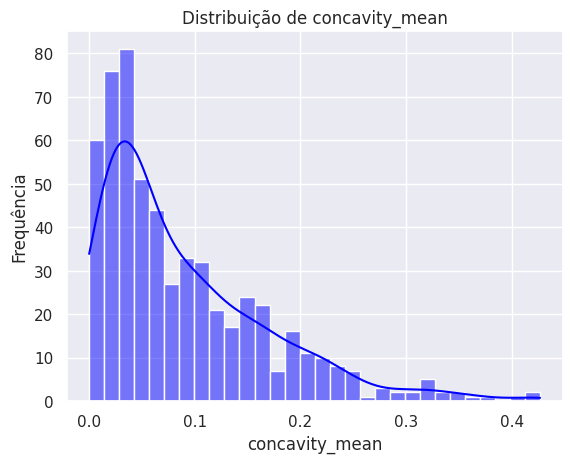

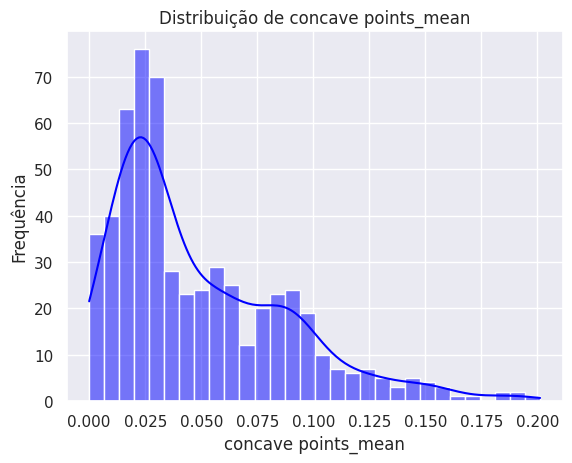

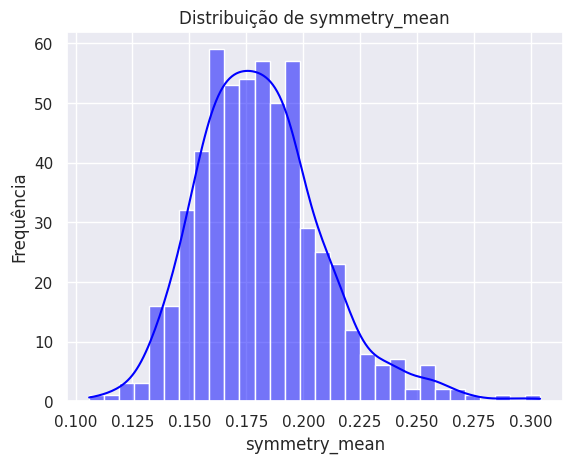

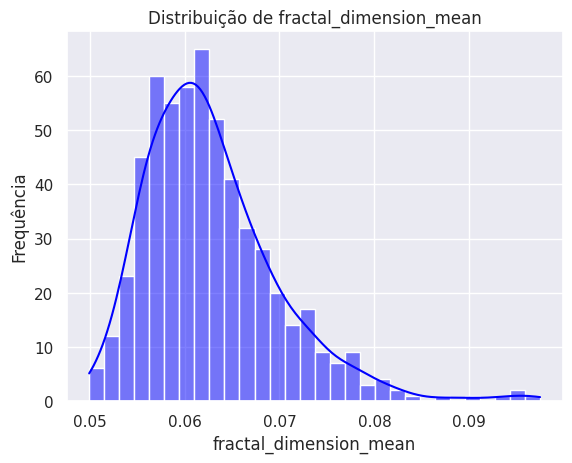

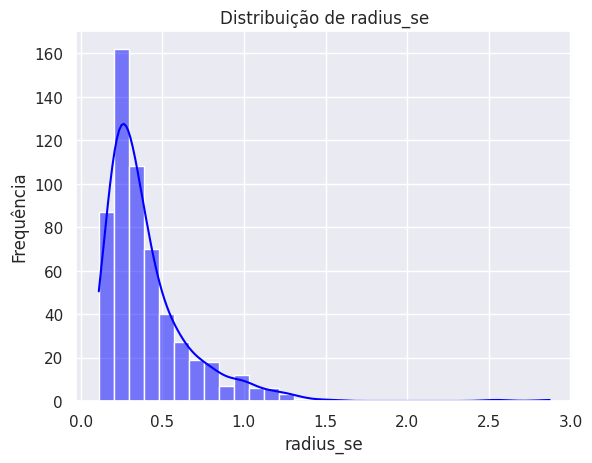

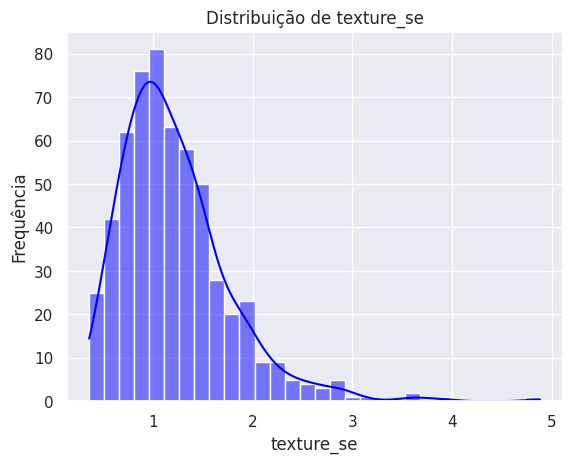

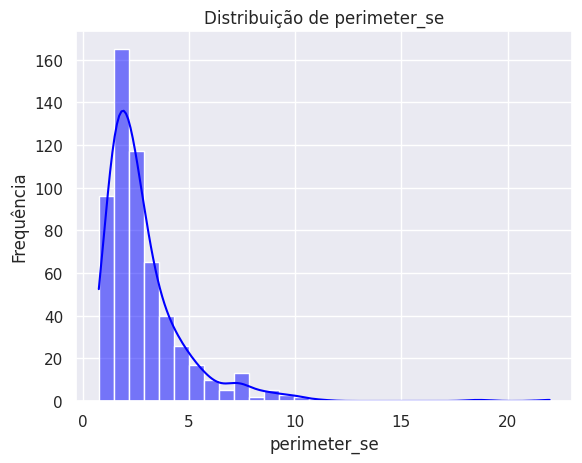

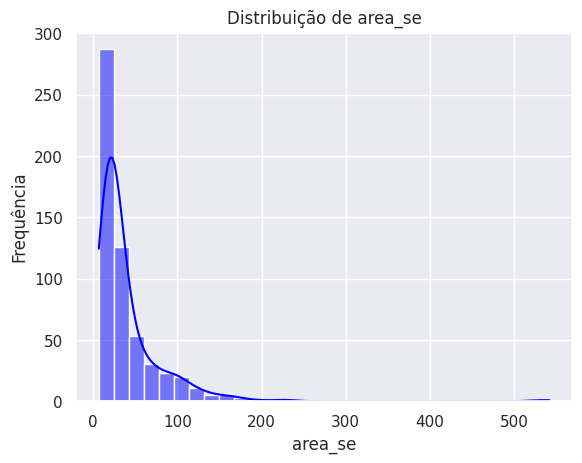

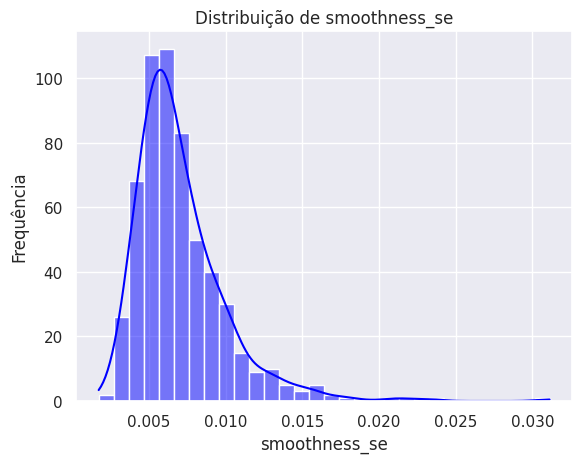

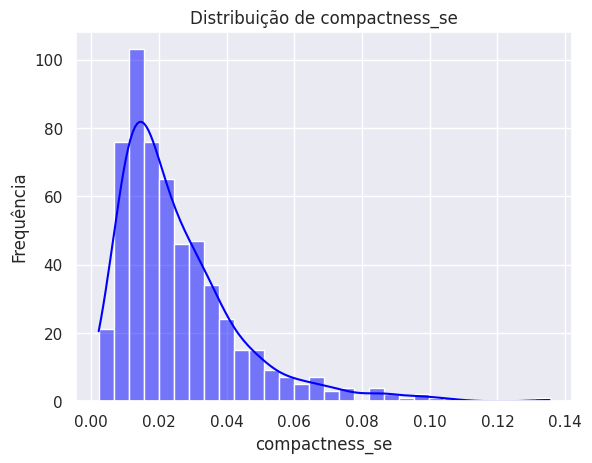

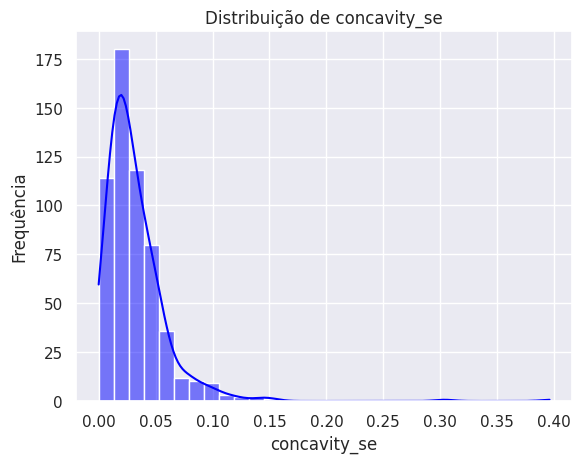

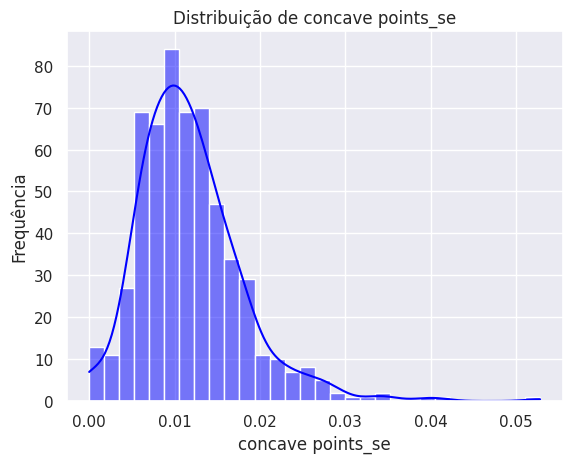

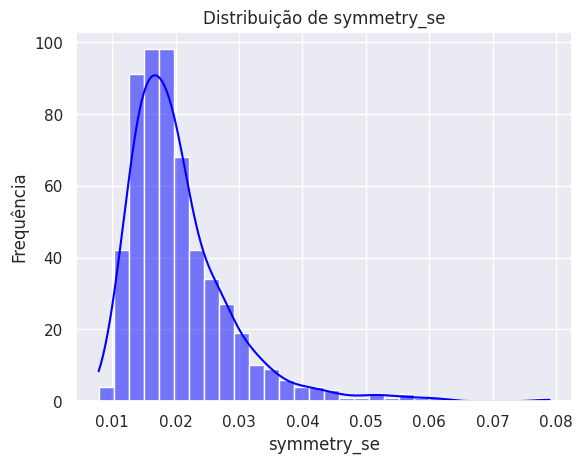

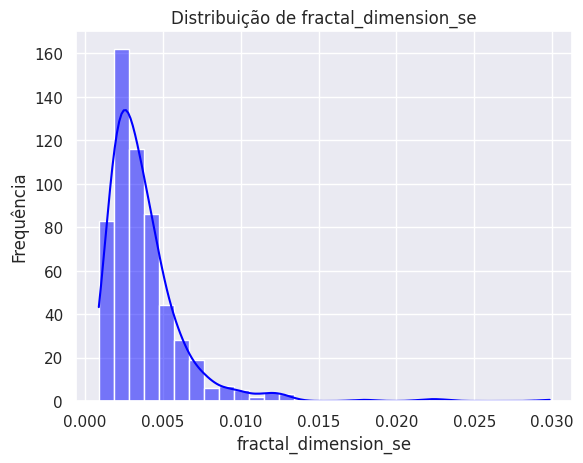

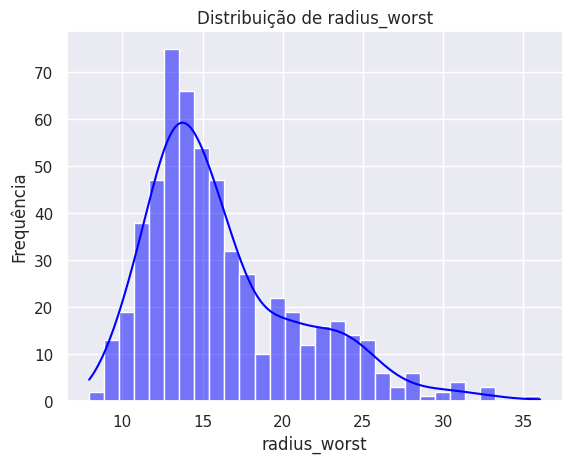

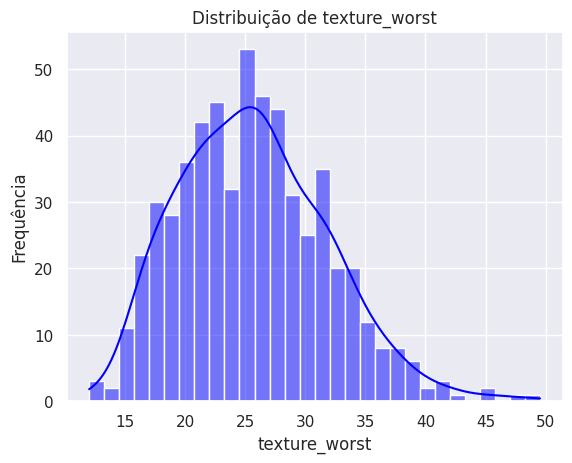

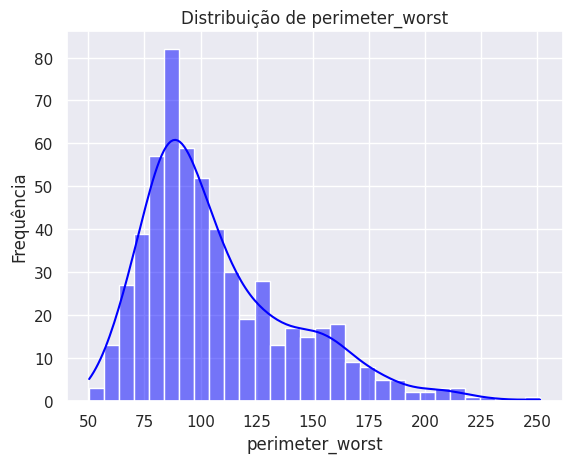

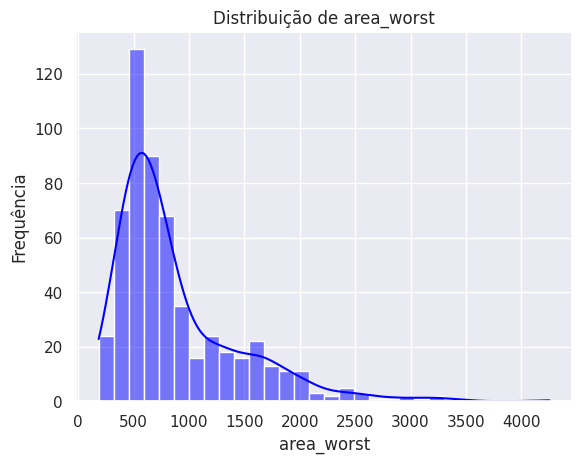

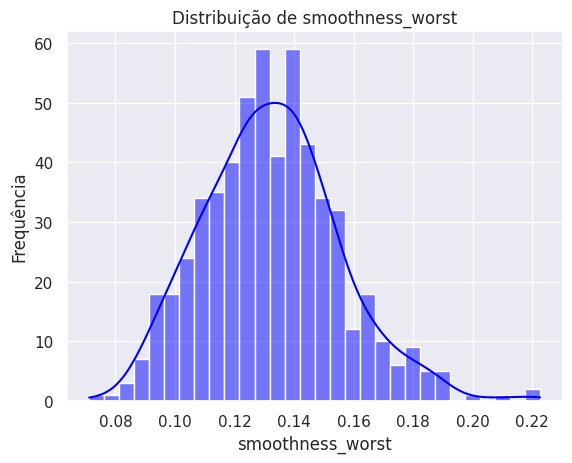

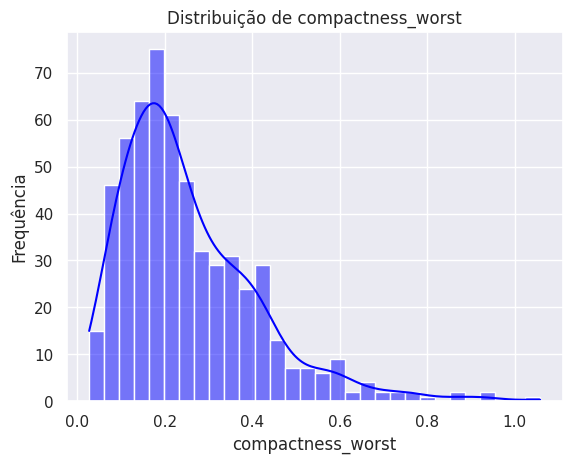

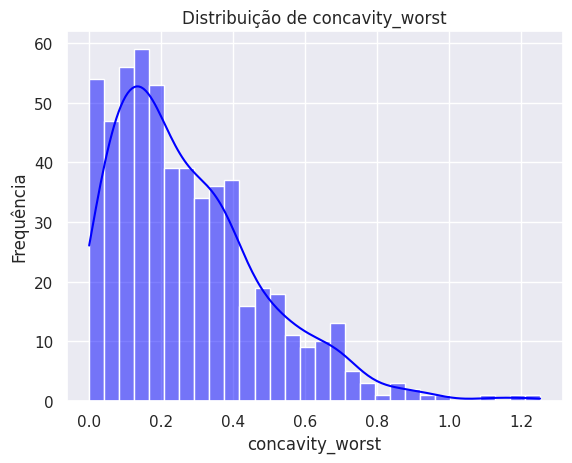

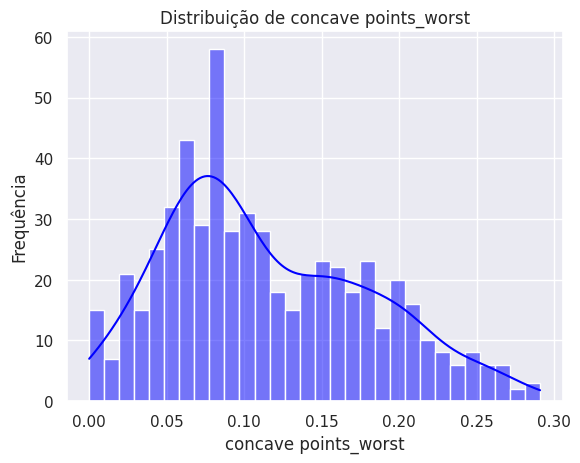

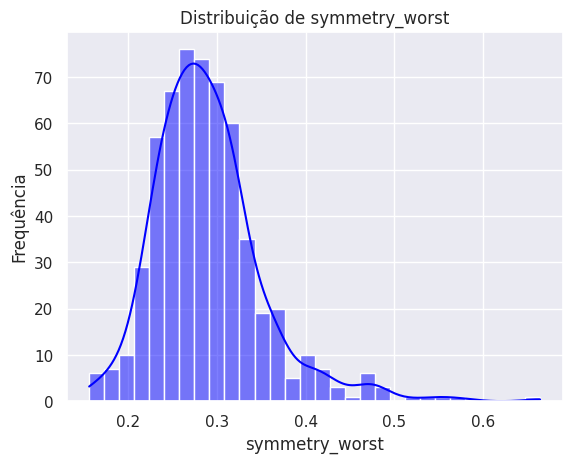

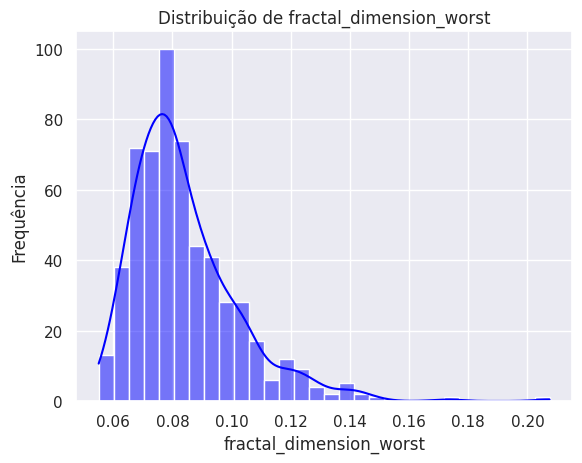

In [21]:
for column in df.select_dtypes(include=['float64']):
    sns.histplot(data=df, x=column, kde=True, bins=30, color='blue', stat='count')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.show()

### **Análises Estatísticas Descritivas** <a name="descritiva"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


### **Análise Bivariada** <a name="bivariada"></a>

<p align='justify'> Para explorar a influência das variáveis no diagnóstico, iremos calcular o coeficiente de correlação de Pearson entre cada variável e a variável 'diagnosis'. Em seguida, visualizaremos essa correlação em um heatmap para identificar as relações mais fortes. As variáveis com maior correlação com o diagnóstico serão analisadas em profundidade, utilizando gráficos para entender como elas contribuem para a diferenciação entre tumores benignos e malignos.</p>


### **Correlação Linear**<a name="correlacao"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [23]:
corr_matrix = df.corr()
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


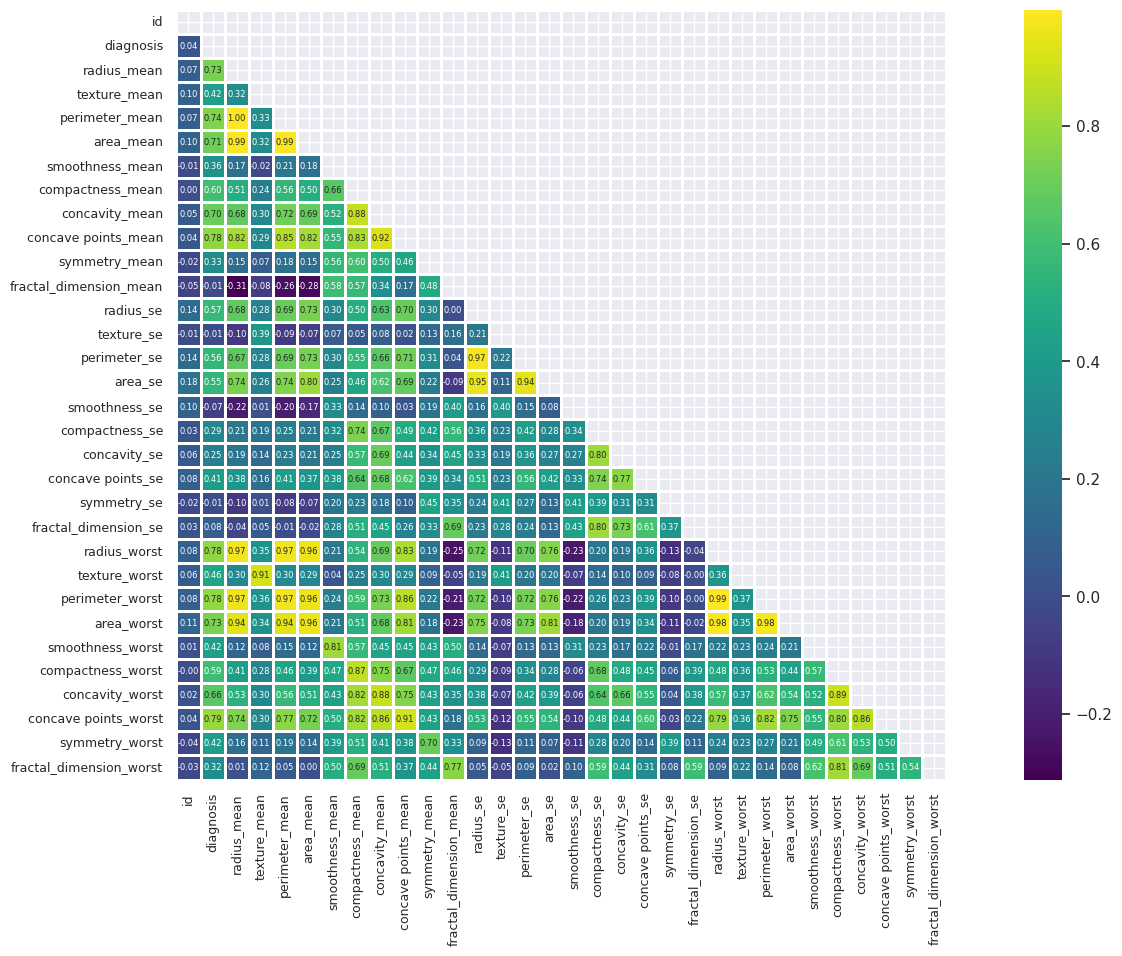

In [24]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,10))

# Plotando o heatmap com personalizações
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',  # Formatando os números com duas casas decimais
            cmap= 'viridis',
            square=True,
            linewidths=2,
            cbar_kws={"shrink": 1},  # Reduzindo o tamanho da barra de cores
            annot_kws={"size": 6})  # Aumentando o tamanho da fonte das anotações

# Rotulando os eixos com fontes maiores
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

<p align = 'justify'> Ao analisar a correlação e o Heatmap das variáveis presentes em nosso dataset  podemos perceber que as variáveis relacionadas a forma e tamanho do tumor como: <b>'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'</b> apresentam uma forte correlação positiva com a variável "diagnóstico". Isso sugere que essas características geométricas dos tumores estão fortemente associadas à presença ou ausência de câncer. </p>
       


### **Análise das Variáveis com maior relação com a variável diagnosis**

- diagnosis x radius_mean

Text(0, 0.5, 'Raio Médio')

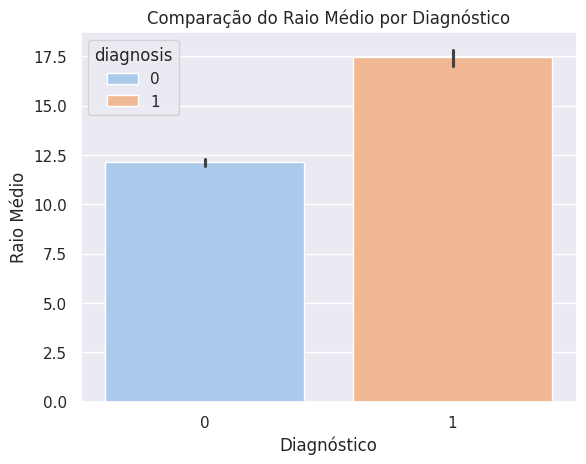

In [25]:
sns.barplot(x='diagnosis', y='radius_mean', hue='diagnosis', data=df, palette= 'pastel')
plt.title('Comparação do Raio Médio por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Raio Médio')


In [26]:
df['perimeter_mean'].sort_values()

,perimeter_mean
101,43.79
568,47.92
538,47.98
539,48.34
46,51.71
...,...
82,171.50
352,174.20
180,182.10
461,186.90


- diagnosis x perimeter_mean

Text(0, 0.5, 'Perimetro Médio')

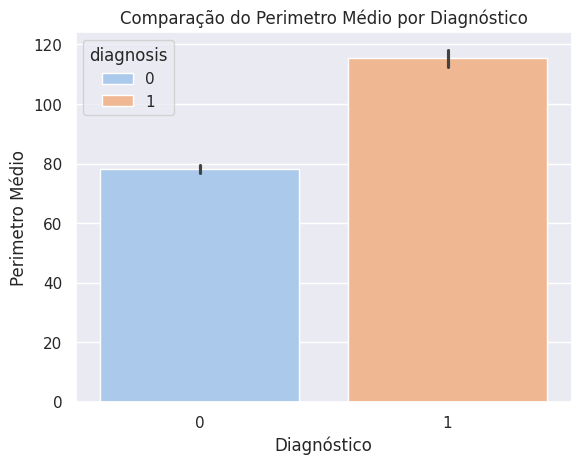

In [27]:
sns.barplot(x='diagnosis', y='perimeter_mean', hue='diagnosis', data=df, palette= 'pastel')
plt.title('Comparação do Perimetro Médio por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Perimetro Médio')

- diagnosis x area_mean


Text(0, 0.5, 'Area Média')

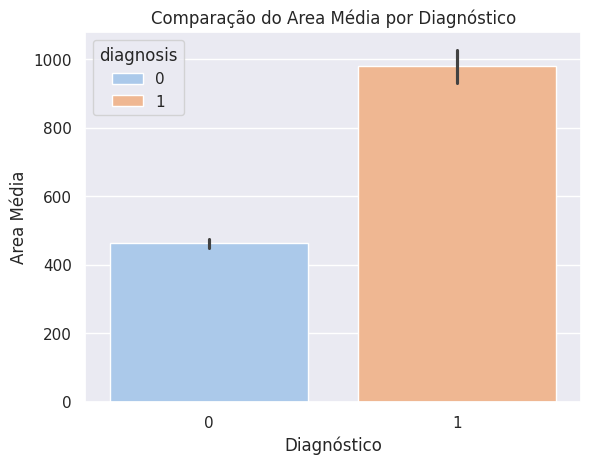

In [28]:
sns.barplot(x='diagnosis', y='area_mean', hue='diagnosis', data=df, palette= 'pastel')
plt.title('Comparação do Area Média por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Area Média')

- diagnosis x concavity_mean

Text(0, 0.5, 'Concavidade Média')

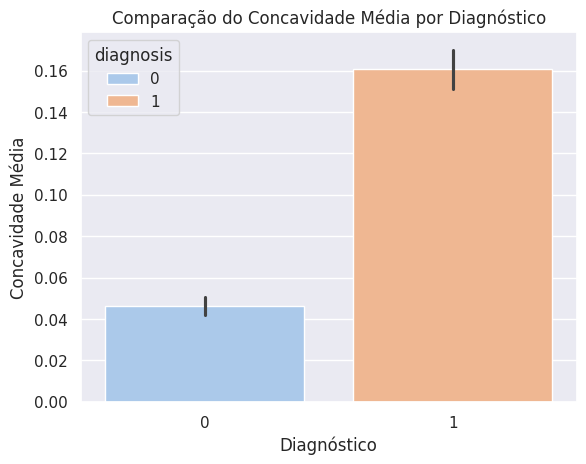

In [29]:
sns.barplot(x='diagnosis', y='concavity_mean', hue='diagnosis', data=df, palette= 'pastel')
plt.title('Comparação do Concavidade Média por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Concavidade Média')

- diagnosis x concave points_mean

Text(0, 0.5, ' Média dos pontos côncavos')

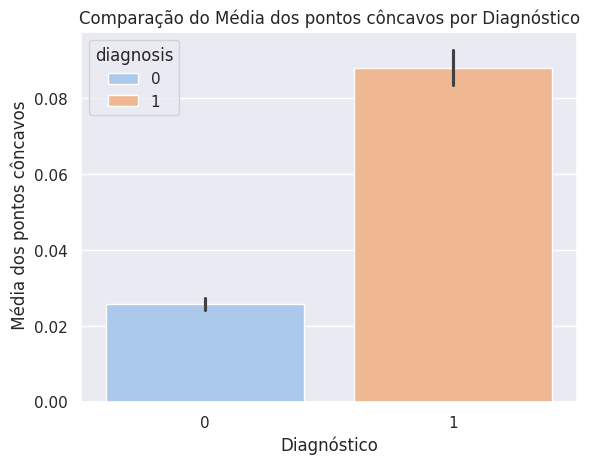

In [30]:
sns.barplot(x='diagnosis', y='concave points_mean', hue='diagnosis', data=df, palette= 'pastel')
plt.title('Comparação do Média dos pontos côncavos por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel(' Média dos pontos côncavos')

- diagnosis x radius_worst

Text(0, 0.5, ' Maior Raio Medido de um Tumor')

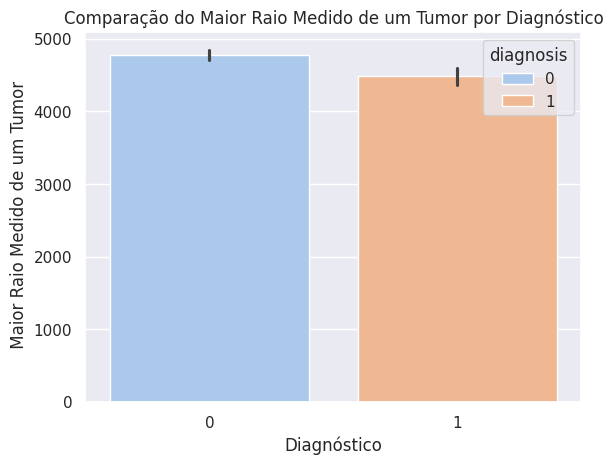

In [31]:
sns.barplot(x='diagnosis', y='radius_worst', hue='diagnosis', estimator='sum', data=df, palette= 'pastel')
plt.title('Comparação do Maior Raio Medido de um Tumor por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel(' Maior Raio Medido de um Tumor')

- diagnosis x perimeter_worst

Text(0, 0.5, 'Perímetro Máximo de um Tumor')

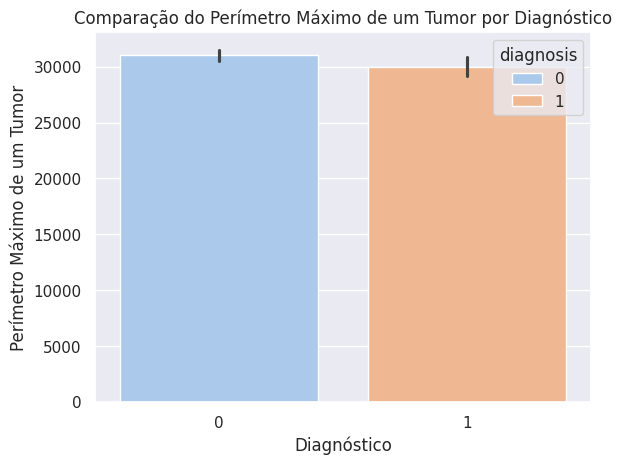

In [32]:
sns.barplot(x='diagnosis', y='perimeter_worst', hue='diagnosis',estimator='sum', data=df, palette= 'pastel')
plt.title('Comparação do Perímetro Máximo de um Tumor por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Perímetro Máximo de um Tumor')

- diagnosis x area_worst

Text(0, 0.5, 'Área mais severa')

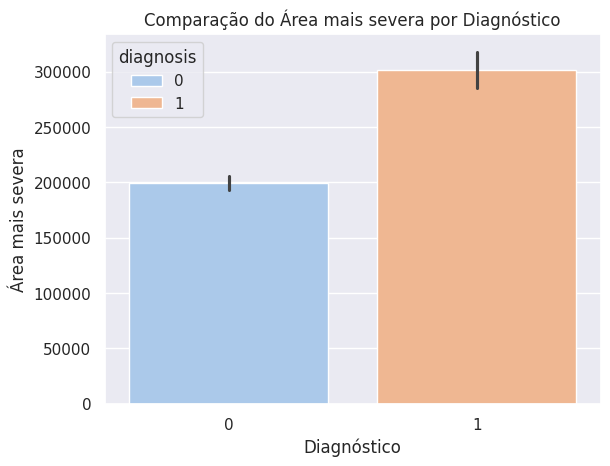

In [33]:
sns.barplot(x='diagnosis', y='area_worst', hue='diagnosis', estimator= 'sum', data=df, palette= 'pastel')
plt.title('Comparação do Área mais severa por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Área mais severa')

- diagnosis x concave points_worst

concave points_worst" representa a maior medida de concavidade encontrada em uma determinada característica de um tumor.

O que isso significa na prática?
Forma do tumor: Tumores malignos tendem a ter formas mais irregulares e com concavidades mais pronunciadas em comparação com tumores benignos.

Text(0, 0.5, 'Maior Medida de Concavidade')

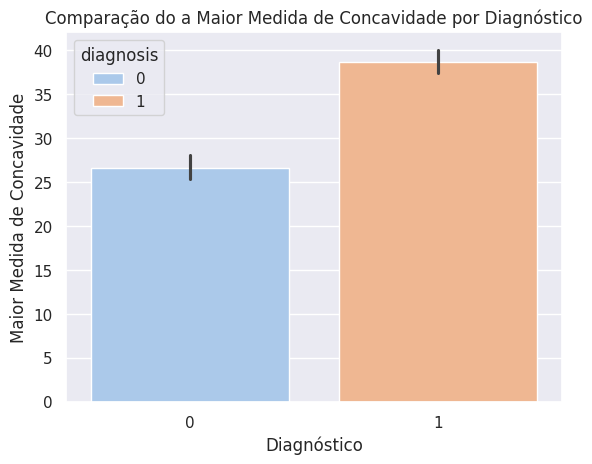

In [34]:
sns.barplot(x='diagnosis', y='concave points_worst', hue='diagnosis', estimator=sum, data=df, palette= 'pastel')
plt.title('Comparação do a Maior Medida de Concavidade por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Maior Medida de Concavidade')


<p align ='justify'> Ao analisar as variáveis relacionadas à forma e textura dos tumores, observamos que a maioria delas apresenta associação com a malignidade. Apenas as variáveis <b>'radius_worst', 'perimeter_worst'</b> não demonstraram uma relação clara com essa característica. Os demais atributos, como <b>'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean','area_worst', 'concave points_worst'</b>, parecem contribuir para a classificação de um tumor como maligno.</p>

<p align ='justify' A partir da análise da correlação das variáveis observamos que as variáveis: radius_mean (74.62%), perimeter_mean	(73.15%), perimeter_worst (79.98%), concave points_worst (0.79), area_worst (0.73), radius_worst  (0.78), concave points_mean (0.78), concavity_mean (0.70), area_mean (0.71) que são relacionadas a forma e tamanho do tumor apresentam uma forte correlação positiva com a variável "diagnóstico". Isso sugere que essas características geométricas dos tumores estão fortemente associadas à presença ou ausência de câncer.

# Pré-Processamento <a name=pre_processamento></a>

<p align= "justify">

A preparação dos dados para análise é fundamental para garantir a qualidade e a confiabilidade dos resultados.</p>

[Voltar ao índice](#Contents)


## Normalização

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# MinMaxScaler
scaler = MinMaxScaler()
df_esc= scaler.fit_transform(df)
df_esc

array([[9.14760426e-04, 1.00000000e+00, 5.21037437e-01, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 1.00000000e+00, 6.43144493e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 1.00000000e+00, 6.01495575e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 1.00000000e+00, 4.55251077e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 1.00000000e+00, 6.44564343e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 0.00000000e+00, 3.68687586e-02, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [36]:
df_esc = pd.DataFrame(df_esc)
df_esc

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000915,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,1.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


## Separação das Variáveis Alvo (y) e das Variáveis Preditoras (X)<a name="separacao"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [37]:
y = df['diagnosis'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [38]:
X = df.drop(columns=['diagnosis']).values
X


array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

## Separação dos Dados Em teino e teste <a name="treinoeteste"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [40]:
print('Quantidade de linhas e colunas de X_train (70%):',
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):',
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):',
      len(y_train))
print('Quantidade de linhas de y_test (30%):',
      len(y_test))

Quantidade de linhas e colunas de X_train (70%): (398, 31)
Quantidade de linhas e colunas de X_test (30%): (171, 31) 

Quantidade de linhas de y_train (70%): 398
Quantidade de linhas de y_test (30%): 171


# Modelagem <a name=modelagem></a>

<p align= "justify">

[Voltar ao índice](#Contents)


<p align = 'justify'>Dentre os modelos avaliados (Naive Bayes, Regressão Logística, KNN, Árvore de Decisão, Random Forest, XGboost, LightGBM e CatBoost), o modelo de XGboost apresentou o melhor desempenho. A análise das métricas revela que o modelo possui uma acurácia de 97,66%, indicando um alto nível de acertos nas predições. A precision de 98,36% garante que, quando o modelo classifica um exemplo como positivo, ele está correto na maioria das vezes, minimizando os falsos positivos. O recall de 95,24% assegura que o modelo identifica a maior parte dos exemplos positivos, reduzindo os falsos negativos. O F1-score de 96,77% demonstra um excelente equilíbrio entre precisão e revocação. A alta capacidade de discriminação, evidenciada pela curva AUC-ROC de 97.15%, garante que o modelo é capaz de tomar decisões acertadas mesmo em casos complexos.</p>
<p align = 'justify'>Considerando os resultados obtidos e a necessidade de um modelo com alta precisão e recall para a detecção de imagens de cancer de mama que classifica um cancer como benigno ou maligno, o modelo de XGboost foi escolhido como o mais adequado para esta aplicação. A capacidade do XGboost de lidar com grandes conjuntos de dados e variáveis categóricas, além da sua robustez a overfitting, foram fatores determinantes para essa escolha.</p>

Abaixo criamos uma tabela com as métricas de cada modelo citado para explicar a escolha do modelo XGboost.

|Acurácia Teste|Acertos Teste| Acurácia Treino|Validação Cruzada|F1 score|Precision score|Recall score|AUC-ROC|Hiperparâmetros|
|-|-|-|-|-|-|-|-|-|
|63.74%||62.06%|62.22%|6.06%|66.67%|3.17%|51.12%|GaussianNB()|
|95.91%||95.98%|95.08%|94.57%|92.42%|96.83%|96.10%|LogisticRegression(C=1, max_iter=500, random_state=1, solver='newton-cg')|
|76.02%||90.95%|80.34%|58.59%|80.56%|46.03%|69.78%|KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)|
|96.49%||99.50%|93.85%|95.24%|95.24%|95.24%|96.23%|DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)|
|96.49%||100.00%|96.32%|95.31%|93.85%|96.83%|96.56%|RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=150, random_state=0)|
|97.66%||100.00%|96.84%|96.77%|98.36%|95.24%|97.16%|XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)|
|97.08%||99.25%|96.14%|96.00%|96.77%|95.24%|96.69%|LGBMClassifier(learning_rate=0.05, max_bin=100, max_depth=2, num_leaves=250,objective='binary')|


## Criando o Modelo

In [41]:
modelo = 	XGBClassifier(max_depth = 2, learning_rate = 0.05, n_estimators = 250, objective ='binary:logistic', random_state = 0)

## Treinando o Modelo

In [42]:
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

## Análise dados de Treino

In [43]:
# Previsões de Treino com base nos Dados de Treino

previsoes_treino = modelo.predict(X_train)


# Convert previsoes_treino to the same type as y_treino
previsoes_treino = previsoes_treino.astype(y_train.dtype)
previsoes_treino

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [44]:
# Comparando as predições com as respostas de treino (y_train)

y_train

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [45]:
# Calculando a Acurária de Treino

print("Acurácia para os dados de Teste é : %.2f%%" % (accuracy_score(y_train, previsoes_treino) * 100.0))

Acurácia para os dados de Teste é : 100.00%


In [46]:
# Criando a Matriz de Confusão da Base de Treino

confusion_matrix(y_train, previsoes_treino)

array([[249,   0],
       [  0, 149]])

In [47]:
# Relatório de classificação dos Dados de Treino

print(classification_report(y_train, previsoes_treino))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



## Análise dados de Teste

In [48]:
# Previsões com base nos Dados de Teste

previsoes_teste = modelo.predict(X_test)
previsoes_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [49]:
# Comparando as predições com as respostas de teste (y_test)

y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [50]:
# Calculando a Acurária de Teste

accuracy_score(y_test, previsoes_teste)
print("Acurácia para os dados de Teste é : %.2f%%" % (accuracy_score(y_test, previsoes_teste) * 100.0))

Acurácia para os dados de Teste é : 98.25%


In [51]:
# Criando a Matriz de Confusão da Base de Teste

cm = confusion_matrix(y_test, previsoes_teste)
print("Matriz de confusão:\n", cm)

Matriz de confusão:
 [[107   1]
 [  2  61]]


In [52]:
# Relatório de classificação dos Dados de Teste

print(classification_report(y_test, previsoes_teste))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Validação Cruzada

In [53]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 0)

In [54]:
# Criando o modelo
val_cruz = cross_val_score(modelo, X, y, cv = kfold)
val_cruz

array([0.94736842, 1.        , 0.94736842, 1.        , 1.        ,
       1.        , 1.        , 0.84210526, 1.        , 1.        ,
       0.94736842, 1.        , 1.        , 0.84210526, 1.        ,
       0.94736842, 0.94736842, 0.89473684, 1.        , 1.        ,
       0.94736842, 1.        , 1.        , 0.84210526, 1.        ,
       1.        , 1.        , 1.        , 0.94736842, 1.        ])

In [55]:
# Usamos a média e o desvio padrão

print("O coeficiente de Validção Cruzada é: %.2f%%" % ((val_cruz).mean() * 100.0))

O coeficiente de Validção Cruzada é: 96.84%


# Avaliação do Modelo<a name=avaliacao_modelo></a>

<p align= "justify">

[Voltar ao índice](#Contents)


In [56]:

# y_true são os rótulos reais e previsoes_teste são as previsões do modelo
accuracy = accuracy_score(y_test, previsoes_teste)*100
print(f'Acurácia: {accuracy}')


precision = precision_score(y_test, previsoes_teste)*100
print(f'Precision: {precision}')



recall = recall_score(y_test, previsoes_teste)*100
print(f'Recall: {recall}')





f1 = f1_score(y_test, previsoes_teste)*100
print(f'F1-Score: {f1}')



auc = roc_auc_score(y_test, previsoes_teste)*100
print(f'AUC-ROC: {auc}')

Acurácia: 98.24561403508771
Precision: 98.38709677419355
Recall: 96.82539682539682
F1-Score: 97.6
AUC-ROC: 97.94973544973546


<p align ='justify'> A análise das métricas revela que o modelo possui desempenho superior. A <b>Acurácia de 97,66%</b> indica um alto nível de acertos nas predições. A <b>Precision de 98,36%</b> garante que, quando o modelo classifica um exemplo como positivo, ele está correto na maioria das vezes, minimizando os falsos positivos. A <b>Recall de 95,24%</b> assegura que o modelo identifica a maior parte dos exemplos positivos, reduzindo os falsos negativos. O <b>F1-score de 96,77%</b> demonstra um excelente equilíbrio entre precisão e revocação. A alta capacidade de discriminação, evidenciada pela curva <b>AUC-ROC de 97.15%</b>, garante que o modelo é capaz de tomar decisões acertadas mesmo em casos complexos.</p>


# Otimização de Hiperparâmetros<a name=otimizacao></a>

<p align= "justify">

[Voltar ao índice](#Contents)


- Feature importance: Identificar as features mais importantes para o modelo.
- Regularização: Aplicar técnicas de regularização para evitar overfitting.
- Ensemble methods: Combinar diferentes modelos para melhorar o desempenho.
- Métricas: Calcular as métricas de avaliação definidas na introdução.
- Matriz de confusão: Analisar a matriz de confusão para entender os erros do modelo.
- Curva ROC: Para problemas de classificação binária, plotar a curva ROC para avaliar o desempenho do modelo.

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
# Criando o algoritmo
gbm = XGBClassifier(random_state=0)

In [59]:
# Determinando o espaço do hiperparâmetro
param_grid = dict(
    n_estimators=[20, 50, 100, 250],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[1,2,3,4,5],
    objective= ['binary:logistic', 'multi:softprob','multi:softmax'],
    num_class=[1, 2, 3, 4, 5]
    )

In [60]:
print('Número de combinações de Hiperparâmetros: ',
      len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth'])* len(param_grid['objective'])* len(param_grid['num_class']))

Número de combinações de Hiperparâmetros:  900


In [61]:
# Configurando a procura com o Grid search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=4)

In [62]:
# Configurando os melhores hiperparâmetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 50, 100, 250],
                         'num_class': [1, 2, 3, 4, 5],
                         'objective': ['binary:logistic', 'multi:softprob',
                                       'multi:softmax']},
             scoring='roc_auc')

In [63]:
# Melhores Hiperparâmetros

grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 50,
 'num_class': 2,
 'objective': 'multi:softprob'}

In [64]:
# Relação dos dados para todos os modelos

resultado = pd.DataFrame(grid_search.cv_results_)
print(resultado.shape)
resultado.head(3)

(900, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_class,param_objective,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020361,0.010995,0.006121,0.003846,0.05,1,20,1,binary:logistic,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.959459,0.974533,0.957062,0.957934,0.962247,0.007145,180
1,0.003975,0.001045,0.000000,0.000000,0.05,1,20,1,multi:softprob,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,181
2,0.002902,0.000333,0.000000,0.000000,0.05,1,20,1,multi:softmax,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,181


In [65]:
# Ordenando os melhores resultados
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True)

resultado.reset_index(drop=True, inplace=True)

resultado[['param_max_depth', 'param_learning_rate', 'param_n_estimators',
    'mean_test_score', 'std_test_score']].head()

,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,3,0.5,50,0.993441,0.002793
1,3,0.5,50,0.993441,0.002793
2,3,0.5,250,0.993332,0.002849
3,3,0.5,100,0.993332,0.002849
4,3,0.5,100,0.993332,0.002849


# Implementação<a name=implementacao></a>

<p align= "justify">

[Voltar ao índice](#Contents)

## Salvando o modelo

- Salvando a variável resposta (alvo)

In [66]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [67]:
np.savetxt('alvo.csv', y, delimiter=',')

Salvando as variáveis explicativas (previsores)

In [68]:
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [69]:
np.savetxt('previsores.csv', X, delimiter=',')

## Criando uma função de predição

**Carregando o Classificador XGBoost**

In [70]:
from xgboost import XGBClassifier
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=0)
xg.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

**Criando a Função**

In [71]:
def simulacao(paciente):
 # Reshape the patient data to a 2D array with one row and multiple columns
  paciente = np.array(paciente).reshape(1, -1)
  # This ensures the input has the correct shape for XGBoost predict

  resultado = xg.predict(paciente)

  if resultado == 1:
    print('O câncer APRESENTA características malígnas')
  else:
    print('O câncer NÃO APRESENTA cracterísticas malígnas')

**Simulação de Novos Pacientes**

In [72]:
paciente1 = [142369.000000, 20.990000, 10.380000, 119.800000, 1001.000000, 0.218400, 0.277600, 0.300100, 0.147100, 0.241900, 0.078710,1.095000, 0.905300, 8.589000, 153.400000, 0.006399, 0.049040, 0.053730, 0.015870, 0.030030, 0.006193, 25.380000, 17.330000, 184.600000, 2019.000000, 0.162200, 0.235600, 0.711900, 0.305400, 0.460100, 0.118900]


In [73]:
simulacao(paciente1)

O câncer APRESENTA características malígnas


# Conclusão<a name=conclusao></a>

<p align= "justify">

[Voltar ao índice](#Contents)


<p align ='justify'> O modelo XGboost demonstrou excelente desempenho na classificação de imagens de câncer de mama, alcançando uma acurácia de 97,66% e um F1-score de 96,77%. A análise da importância das features revelou que atributos relacionados à forma e tamanho do tumor, como <b>'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean','area_worst', 'concave points_worst'</b>, apresentaram os maiores valores de importância, corroborando com estudos da literatura médica que apontam a morfologia tumoral como um dos principais indicadores de malignidade. A capacidade do XGboost de lidar com grandes conjuntos de dados e variáveis categóricas o tornou a escolha mais adequada para este problema. No entanto, a generalização do modelo e a interpretabilidade dos modelos de ensemble são desafios a serem superados. Trabalhos futuros podem explorar a aplicação de técnicas de deep learning, como CNNs, e a desenvolvimento de modelos mais explicáveis para aumentar a confiabilidade e a interpretabilidade da ferramenta. Os resultados obtidos neste trabalho demonstram o potencial do machine learning para auxiliar no diagnóstico precoce do câncer de mama, contribuindo para a melhoria da qualidade de vida dos pacientes.</p>